# Exploração dos Dados

In [880]:
# Importação de dependencias
import pandas as pd


# Exploração dos Dados

In [881]:
df = pd.read_csv('../database/bitcoin.csv')
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,02.09.2024,"59.247,7","57.309,0","59.276,9","57.185,8","75,63K","3,37%"
1,01.09.2024,"57.315,7","58.975,7","59.058,7","57.232,4","63,95K","-2,82%"
2,31.08.2024,"58.978,6","59.120,4","59.447,0","58.761,1","30,86K","-0,24%"
3,30.08.2024,"59.119,7","59.371,7","59.817,6","57.874,7","87,31K","-0,43%"
4,29.08.2024,"59.373,5","59.027,3","61.150,6","58.807,1","87,19K","0,61%"


##### Data = Data da análise do Bitcoin
##### Último = Preço de fechamento mais recente do período
##### Abertura = Valor que o Bitcoin começou a ser negociado
##### Máxima = Valor máximo que o Bitcoin chegou naquele período
##### Vol. = Valor de negociação do Bitcoin no período
##### Var% = Valor da variação percentual do preço do Bitcoin em relação ao período anterior

In [882]:
# verificando os tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      611 non-null    object
 1   Último    611 non-null    object
 2   Abertura  611 non-null    object
 3   Máxima    611 non-null    object
 4   Mínima    611 non-null    object
 5   Vol.      611 non-null    object
 6   Var%      611 non-null    object
dtypes: object(7)
memory usage: 33.5+ KB


In [883]:
# verificando se existem dados NaN
df.isna().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

In [884]:
# Verificando se existem dados nulos
df.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

In [885]:
# Renomeando as colunas
df = df.rename(columns={'Último': 'Ultimo', 'Máxima': 'Maxima', 'Mínima': 'Minima', 'Vol.': 'Vol'})

In [886]:
df['Vol'] = df['Vol'].replace('K', '000')
df

,Data,Ultimo,Abertura,Maxima,Minima,Vol,Var%
0,02.09.2024,"59.247,7","57.309,0","59.276,9","57.185,8","75,63K","3,37%"
1,01.09.2024,"57.315,7","58.975,7","59.058,7","57.232,4","63,95K","-2,82%"
2,31.08.2024,"58.978,6","59.120,4","59.447,0","58.761,1","30,86K","-0,24%"
3,30.08.2024,"59.119,7","59.371,7","59.817,6","57.874,7","87,31K","-0,43%"
4,29.08.2024,"59.373,5","59.027,3","61.150,6","58.807,1","87,19K","0,61%"
...,...,...,...,...,...,...,...
606,05.01.2023,"16.829,8","16.852,2","16.877,9","16.772,3","178,96K","-0,13%"
607,04.01.2023,"16.852,1","16.674,2","16.976,5","16.656,5","247,39K","1,07%"
608,03.01.2023,"16.674,2","16.673,1","16.773,2","16.607,2","178,73K","0,00%"
609,02.01.2023,"16.674,3","16.618,4","16.766,9","16.551,0","136,03K","0,34%"


In [887]:
# Colocando os dados no formato correto

df['Vol'] = df['Vol'].str.replace('K', '000')
df['Var%'] = df['Var%'].str.replace('%', '')
df

,Data,Ultimo,Abertura,Maxima,Minima,Vol,Var%
0,02.09.2024,"59.247,7","57.309,0","59.276,9","57.185,8","75,63000","3,37"
1,01.09.2024,"57.315,7","58.975,7","59.058,7","57.232,4","63,95000","-2,82"
2,31.08.2024,"58.978,6","59.120,4","59.447,0","58.761,1","30,86000","-0,24"
3,30.08.2024,"59.119,7","59.371,7","59.817,6","57.874,7","87,31000","-0,43"
4,29.08.2024,"59.373,5","59.027,3","61.150,6","58.807,1","87,19000","0,61"
...,...,...,...,...,...,...,...
606,05.01.2023,"16.829,8","16.852,2","16.877,9","16.772,3","178,96000","-0,13"
607,04.01.2023,"16.852,1","16.674,2","16.976,5","16.656,5","247,39000","1,07"
608,03.01.2023,"16.674,2","16.673,1","16.773,2","16.607,2","178,73000","0,00"
609,02.01.2023,"16.674,3","16.618,4","16.766,9","16.551,0","136,03000","0,34"


In [888]:
# Transformação para float dos dados 
for i in df.columns:
    try:
        if(i != 'Data'):
            df[f'{i}'] = df[f'{i}'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
    except:
        pass
df

,Data,Ultimo,Abertura,Maxima,Minima,Vol,Var%
0,02.09.2024,59247.7,57309.0,59276.9,57185.8,75.63,3.37
1,01.09.2024,57315.7,58975.7,59058.7,57232.4,63.95,-2.82
2,31.08.2024,58978.6,59120.4,59447.0,58761.1,30.86,-0.24
3,30.08.2024,59119.7,59371.7,59817.6,57874.7,87.31,-0.43
4,29.08.2024,59373.5,59027.3,61150.6,58807.1,87.19,0.61
...,...,...,...,...,...,...,...
606,05.01.2023,16829.8,16852.2,16877.9,16772.3,178.96,-0.13
607,04.01.2023,16852.1,16674.2,16976.5,16656.5,247.39,1.07
608,03.01.2023,16674.2,16673.1,16773.2,16607.2,178.73,0.00
609,02.01.2023,16674.3,16618.4,16766.9,16551.0,136.03,0.34


In [889]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      611 non-null    object 
 1   Ultimo    611 non-null    float64
 2   Abertura  611 non-null    float64
 3   Maxima    611 non-null    float64
 4   Minima    611 non-null    float64
 5   Vol       611 non-null    float64
 6   Var%      611 non-null    float64
dtypes: float64(6), object(1)
memory usage: 33.5+ KB


In [890]:
# Transformando os dados para os tipos adequados
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
df['Ultimo'] = pd.to_numeric(df['Ultimo'])
df

,Data,Ultimo,Abertura,Maxima,Minima,Vol,Var%
0,2024-09-02,59247.7,57309.0,59276.9,57185.8,75.63,3.37
1,2024-09-01,57315.7,58975.7,59058.7,57232.4,63.95,-2.82
2,2024-08-31,58978.6,59120.4,59447.0,58761.1,30.86,-0.24
3,2024-08-30,59119.7,59371.7,59817.6,57874.7,87.31,-0.43
4,2024-08-29,59373.5,59027.3,61150.6,58807.1,87.19,0.61
...,...,...,...,...,...,...,...
606,2023-01-05,16829.8,16852.2,16877.9,16772.3,178.96,-0.13
607,2023-01-04,16852.1,16674.2,16976.5,16656.5,247.39,1.07
608,2023-01-03,16674.2,16673.1,16773.2,16607.2,178.73,0.00
609,2023-01-02,16674.3,16618.4,16766.9,16551.0,136.03,0.34


In [891]:
df = df.sort_values(['Data'])

In [892]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 610 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      611 non-null    datetime64[ns]
 1   Ultimo    611 non-null    float64       
 2   Abertura  611 non-null    float64       
 3   Maxima    611 non-null    float64       
 4   Minima    611 non-null    float64       
 5   Vol       611 non-null    float64       
 6   Var%      611 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 38.2 KB


In [893]:
# Normalização dos dados
import numpy as np
import math
columns = ['Ultimo', 'Abertura', 'Maxima', 'Minima', 'Vol', 'Var%']
df_max_scaled = df.copy() 
  
# apply normalization techniques 
for column in df_max_scaled.columns:
    if column != "Data":
        df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 
      
# view normalized data 
display(df_max_scaled) 

,Data,Ultimo,Abertura,Maxima,Minima,Vol,Var%
610,2023-01-01,0.227443,0.226334,0.225410,0.231288,0.143202,0.041039
609,2023-01-02,0.228208,0.227442,0.227376,0.232007,0.180636,0.028476
608,2023-01-03,0.228206,0.228190,0.227461,0.232795,0.237338,0.000000
607,2023-01-04,0.230641,0.228205,0.230218,0.233486,0.328513,0.089615
606,2023-01-05,0.230336,0.230641,0.228881,0.235109,0.237644,-0.010888
...,...,...,...,...,...,...,...
4,2024-08-29,0.812598,0.807855,0.829263,0.824340,0.115781,0.051089
3,2024-08-30,0.809124,0.812569,0.811186,0.811270,0.115940,-0.036013
2,2024-08-31,0.807193,0.809129,0.806160,0.823695,0.040979,-0.020101
1,2024-09-01,0.784434,0.807149,0.800895,0.802266,0.084920,-0.236181


# Implementação do Modelo

Para implmentação do modelo foi escolhido o **Generalized Autoregressive Conditional Heteroskedasticity(GARCH)**, pois ele é amplamente utilizado em previsões financeiras para capturar a volatibilidade de valores ao longo do tempo. Assim, como meu problema gira em torno de querer saber em qual dia da semana é a melhor escolha para comprar Bitcoin, esse modelo se apresenta o melhor para minhas métricas.

Além disso, está sendo utilizado o **Arima** para prever os dados futuros para cada valor do Bitcoin, pois assim será indicado quais são os melhores dias da semana para fazer essa compra.

In [894]:
# Resultados das métricas pegando os logs
import numpy as np
df['log_return'] = (df['Ultimo'] / df['Ultimo'].shift(1)).apply(lambda x: np.log(x))
df.dropna(inplace=True)
print(df.head())


          Data   Ultimo  Abertura   Maxima   Minima     Vol  Var%  log_return
609 2023-01-02  16674.3   16618.4  16766.9  16551.0  136.03  0.34    0.003358
608 2023-01-03  16674.2   16673.1  16773.2  16607.2  178.73  0.00   -0.000006
607 2023-01-04  16852.1   16674.2  16976.5  16656.5  247.39  1.07    0.010613
606 2023-01-05  16829.8   16852.2  16877.9  16772.3  178.96 -0.13   -0.001324
605 2023-01-06  16950.9   16829.8  17012.3  16707.6  233.47  0.72    0.007170


In [895]:
from arch import arch_model

# Modelo GARCH (1, 1)
model = arch_model(
    
    ['log_return'], vol='Garch', p=1, q=1)
garch_fit = model.fit()

# Resumo do ajuste do modelo
print(garch_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 71107906720.78424
Iteration:      2,   Func. Count:     17,   Neg. LLF: 683.0742131005427
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2956604.4148466485
Iteration:      4,   Func. Count:     36,   Neg. LLF: -1368.597113265968
Iteration:      5,   Func. Count:     43,   Neg. LLF: -1369.92821555638
Iteration:      6,   Func. Count:     50,   Neg. LLF: -1376.162022649501
Iteration:      7,   Func. Count:     56,   Neg. LLF: -1387.7194330354473
Iteration:      8,   Func. Count:     62,   Neg. LLF: -1387.828464367829
Iteration:      9,   Func. Count:     67,   Neg. LLF: -1387.8410035496004
Iteration:     10,   Func. Count:     72,   Neg. LLF: -1387.8411416619933
Iteration:     11,   Func. Count:     77,   Neg. LLF: -1387.8411520661869
Iteration:     12,   Func. Count:     81,   Neg. LLF: -1387.841152066128
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1387.8411520661869
            I

c:\Users\Inteli\Documents\GitHub\modulo-7\venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000648. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [896]:
forecasts = garch_fit.forecast(horizon=30)  # Prevendo os próximos 30 dias
volatility = forecasts.variance[-1:]

# Exibindo a volatilidade prevista
print(volatility)

       h.01      h.02      h.03      h.04      h.05      h.06      h.07  \
0  0.000667  0.000666  0.000666  0.000666  0.000666  0.000666  0.000665   

       h.08      h.09      h.10  ...      h.21      h.22      h.23      h.24  \
0  0.000665  0.000665  0.000665  ...  0.000665  0.000665  0.000665  0.000665   

       h.25      h.26      h.27      h.28      h.29      h.30  
0  0.000665  0.000665  0.000665  0.000665  0.000665  0.000665  

[1 rows x 30 columns]


In [899]:
df.columns

Index(['Data', 'Ultimo', 'Abertura', 'Maxima', 'Minima', 'Vol', 'Var%',
       'log_return'],
      dtype='object')

In [900]:
df

,Data,Ultimo,Abertura,Maxima,Minima,Vol,Var%,log_return
609,2023-01-02,16674.3,16618.4,16766.9,16551.0,136.03,0.34,0.003358
608,2023-01-03,16674.2,16673.1,16773.2,16607.2,178.73,0.00,-0.000006
607,2023-01-04,16852.1,16674.2,16976.5,16656.5,247.39,1.07,0.010613
606,2023-01-05,16829.8,16852.2,16877.9,16772.3,178.96,-0.13,-0.001324
605,2023-01-06,16950.9,16829.8,17012.3,16707.6,233.47,0.72,0.007170
...,...,...,...,...,...,...,...,...
4,2024-08-29,59373.5,59027.3,61150.6,58807.1,87.19,0.61,0.006039
3,2024-08-30,59119.7,59371.7,59817.6,57874.7,87.31,-0.43,-0.004284
2,2024-08-31,58978.6,59120.4,59447.0,58761.1,30.86,-0.24,-0.002390
1,2024-09-01,57315.7,58975.7,59058.7,57232.4,63.95,-2.82,-0.028600


In [902]:
df.columns

Index(['Data', 'Ultimo', 'Abertura', 'Maxima', 'Minima', 'Vol', 'Var%',
       'log_return'],
      dtype='object')

c:\Users\Inteli\Documents\GitHub\modulo-7\venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006491. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 9305276.777997844
Iteration:      2,   Func. Count:     17,   Neg. LLF: 201004149.04560494
Iteration:      3,   Func. Count:     27,   Neg. LLF: -1383.6768917507115
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1383.6768911473891
            Iterations: 7
            Function evaluations: 27
            Gradient evaluations: 3


c:\Users\Inteli\Documents\GitHub\modulo-7\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Inteli\Documents\GitHub\modulo-7\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Inteli\Documents\GitHub\modulo-7\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Previsões de preços e sinais de compra para os próximos 5 dias:
            forecast_volatility  forecast_price  previous_week_avg  buy_signal
2024-09-03             0.000662    58996.074393       58928.871429       False
2024-09-04             0.000661    59088.657309       58928.871429       False
2024-09-05             0.000660    59057.613267       58928.871429       False
2024-09-06             0.000659    59074.714760       58928.871429       False
2024-09-07             0.000658    59095.690454       58928.871429       False
Descrição das previsões de preços e sinais de compra:
       forecast_volatility  forecast_price  previous_week_avg
count             5.000000        5.000000           5.000000
mean              0.000660    59062.550037       58928.871429
std               0.000002       39.910025           0.000000
min               0.000658    58996.074393       58928.871429
25%               0.000659    59057.613267       58928.871429
50%               0.000660    59074.

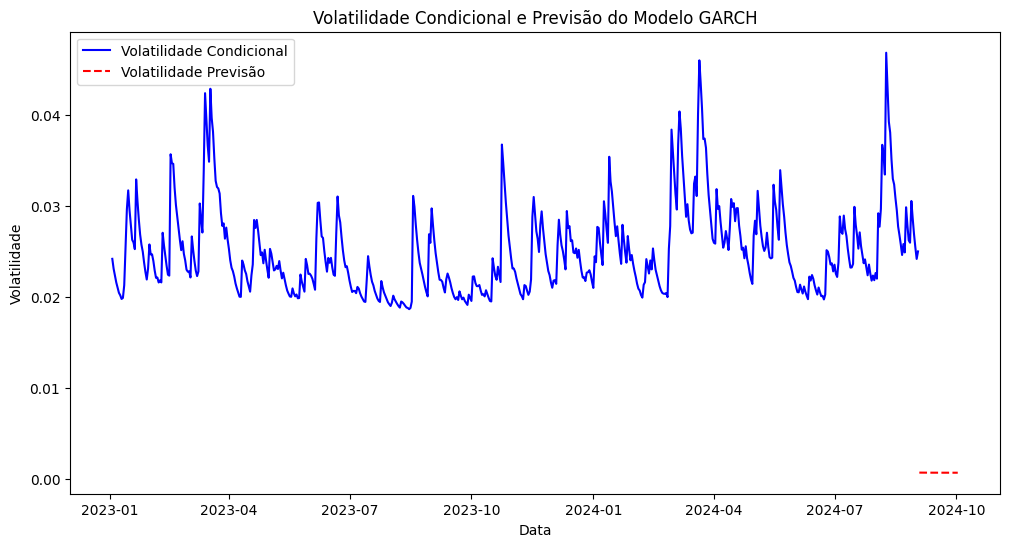

In [907]:
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

# Carregar os dados
df.set_index("Data", inplace=True)

# Verificar e garantir que 'Ultimo' é uma série numérica unidimensional
if df['Ultimo'].ndim != 1:
    raise ValueError("A coluna 'Ultimo' não está em formato unidimensional.")

# Garantir que não há valores nulos ou não numéricos
df = df[['Ultimo']].dropna()
df['Ultimo'] = pd.to_numeric(df['Ultimo'], errors='coerce')

# Calcular o retorno logarítmico
df['log_return'] = np.log(df['Ultimo'] / df['Ultimo'].shift(1))
df.dropna(inplace=True)

# Ajustar o modelo GARCH (1, 1)
model = arch_model(df['log_return'], vol='Garch', p=1, q=1)
garch_fit = model.fit()

# Previsão da volatilidade para os próximos 30 dias
forecast_horizon = 30
forecasts = garch_fit.forecast(horizon=forecast_horizon)
volatility_forecast = forecasts.variance.values[-1]  # Assegure-se que está pegando a última linha

# Criar DataFrame para previsões
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon)
forecast_df = pd.DataFrame(volatility_forecast, index=forecast_dates, columns=['forecast_volatility'])

# Adicionar a coluna de preços previstos (por simplicidade, usando um modelo ARIMA para preços)
from statsmodels.tsa.arima.model import ARIMA

# Ajustar o modelo ARIMA para prever o preço
arima_model = ARIMA(df['Ultimo'], order=(5,1,0))
arima_fit = arima_model.fit()

# Prever o preço para os próximos 30 dias
price_forecast = arima_fit.forecast(steps=forecast_horizon)
forecast_df['forecast_price'] = price_forecast

# Adicionar coluna com sinal de compra
# Obter o preço da semana passada para comparação
one_week_ago = df.index[-7:]
prices_last_week = df.loc[one_week_ago, 'Ultimo'].mean()  # Média dos preços da semana passada

forecast_df['previous_week_avg'] = prices_last_week

# Adicionar coluna com sinal de compra
forecast_df['buy_signal'] = forecast_df['forecast_price'] < forecast_df['previous_week_avg']

# Obter previsões para os próximos 5 dias
forecast_5_days = forecast_df.head(5)

# Diagnóstico das previsões
print("Previsões de preços e sinais de compra para os próximos 5 dias:")
print(forecast_5_days)
print("Descrição das previsões de preços e sinais de compra:")
print(forecast_5_days.describe())

# Ajustar critério de seleção
percentil = 10
threshold = np.percentile(forecast_df['forecast_volatility'], percentil)
best_forecast_days = forecast_df[forecast_df['forecast_volatility'] <= threshold]

# Exibir os melhores dias para comprar Bitcoin (baseado em baixa volatilidade e previsão de preço menor que o preço da semana passada)
print("Melhores dias para comprar Bitcoin (baseado em baixa volatilidade e previsão de preço menor que o preço da semana passada):")
print(best_forecast_days)

# Visualizar a volatilidade prevista
plt.figure(figsize=(12, 6))
plt.plot(df.index, garch_fit.conditional_volatility, label='Volatilidade Condicional', color='blue')
plt.plot(forecast_df.index, forecast_df['forecast_volatility'], label='Volatilidade Previsão', color='red', linestyle='--')
plt.title("Volatilidade Condicional e Previsão do Modelo GARCH")
plt.xlabel("Data")
plt.ylabel("Volatilidade")
plt.legend()
plt.show()
